In [10]:
print("hello world")

hello world


In [11]:
!pip install tensorflow


In [12]:
!pip install matplotlib

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
import os 
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path= os.path.join(curr_dir,"datasets","Valid")

Current Dir  d:\potato disease


In [15]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",

)

Found 900 files belonging to 3 classes.


In [16]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [18]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4290 - loss: 1.1844 - val_accuracy: 0.5500 - val_loss: 0.8494
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6487 - loss: 0.7416 - val_accuracy: 0.7000 - val_loss: 0.5839
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7211 - loss: 0.6115 - val_accuracy: 0.8067 - val_loss: 0.4318
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8278 - loss: 0.3981 - val_accuracy: 0.7800 - val_loss: 0.4779
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8428 - loss: 0.3843 - val_accuracy: 0.8100 - val_loss: 0.4657
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8294 - loss: 0.3412 - val_accuracy: 0.9233 - val_loss: 0.1866
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9287 - loss: 0.1694 - val_accuracy: 0.7600 - val_loss: 0.5591
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8984 - loss: 0.2423 - val_accuracy: 0.9300 - val_loss:

In [22]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.9770 - loss: 0.0587
Training accuracy: 0.9822221994400024


In [23]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.9394 - loss: 0.1247
validation accuracy: 0.9366666674613953


In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history

{'accuracy': [0.5111111402511597,
  0.6966666579246521,
  0.7588889002799988,
  0.8388888835906982,
  0.8711110949516296,
  0.8844444155693054,
  0.9288889169692993,
  0.9177777767181396,
  0.9622222185134888,
  0.9588888883590698],
 'loss': [0.9983416199684143,
  0.6570610404014587,
  0.5514103770256042,
  0.37378376722335815,
  0.3177352249622345,
  0.2562035918235779,
  0.1699945628643036,
  0.21003517508506775,
  0.11294438689947128,
  0.10986191779375076],
 'val_accuracy': [0.550000011920929,
  0.699999988079071,
  0.8066666722297668,
  0.7799999713897705,
  0.8100000023841858,
  0.9233333468437195,
  0.7599999904632568,
  0.9300000071525574,
  0.9133333563804626,
  0.9366666674613953],
 'val_loss': [0.8494213223457336,
  0.5839201807975769,
  0.43175816535949707,
  0.47785085439682007,
  0.4656740725040436,
  0.18657253682613373,
  0.5591305494308472,
  0.17918817698955536,
  0.25939545035362244,
  0.1344115436077118]}

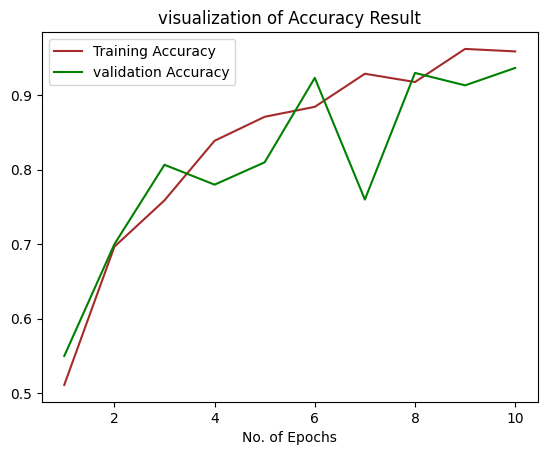

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('visualization of Accuracy Result')
plt.legend()
plt.show()


In [27]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
